# Import packages
Note: This notebook can take a while (~5 min) for the first time due to compilation

In [1]:
from pyrms import rms
from diffeqpy import de
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Change simulation inputs here
`mechanism_path`: path to the generated rms input file

`initial_conds`: a dictionary containing the initial conditions, where
- `T`: temperature (K)
- `P`: pressure (Pa)
- `H2`: number of moles of H2
- `O2`: number of moles of O2

`tspan`: the simulation time span ($t_0$, $t_f$) in second

In [2]:
mechanism_path = "rms/chem13.rms"
initial_conds = {"T": 1000.0, "P": 1.0e5, "H2": 0.67, "O2": 0.33}
tspan = (0.0, 1.0)

### Load the mechanism

In [3]:
phase_dict = rms.readinput(mechanism_path)
spcs = phase_dict["phase"]["Species"]
rxns = phase_dict["phase"]["Reactions"]

RDKit WARNING: [19:57:50] WARNING: not removing hydrogen atom without neighbors
[19:57:50] WARNING: not removing hydrogen atom without neighbors


### Make the ideal gas phase
Phase controls how the thermochemical and kinetic properties are calculated

In [4]:
ig = rms.IdealGas(spcs, rxns, name="gas")

### Set up the domain
Domain controls the assumptions made in the simulation

`ConstantVDomain`: assuming constant V

In [5]:
domain, y0, p = rms.ConstantVDomain(phase=ig, initialconds=initial_conds)

### Set up the reactor

In [6]:
react = rms.Reactor(domain, y0, tspan, p=p)

### Solve the ODEs

In [7]:
sol = de.solve(react.ode, de.CVODE_BDF(), abstol=1e-16, reltol=1e-8)

### Set up simulation object
for easy plotting and analysis

In [8]:
sim = rms.Simulation(sol, domain)

# Analyze simulation results here

## Plot mole fractions as a function of time
Plot mole fractions as a function of time between specified time
- `tf`: final time point
- `tol`: include the species if its mole fraction is above the tolerance any point in time

Text(0, 0.5, 'Mole Fraction')

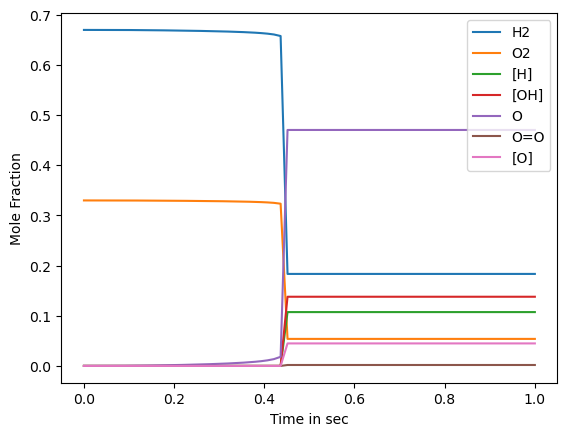

In [9]:
tf = 1.0
rms.plotmolefractions(sim, tf, tol=1e-3)

## Plot flux diagram
Plot flux diagram at time `t`

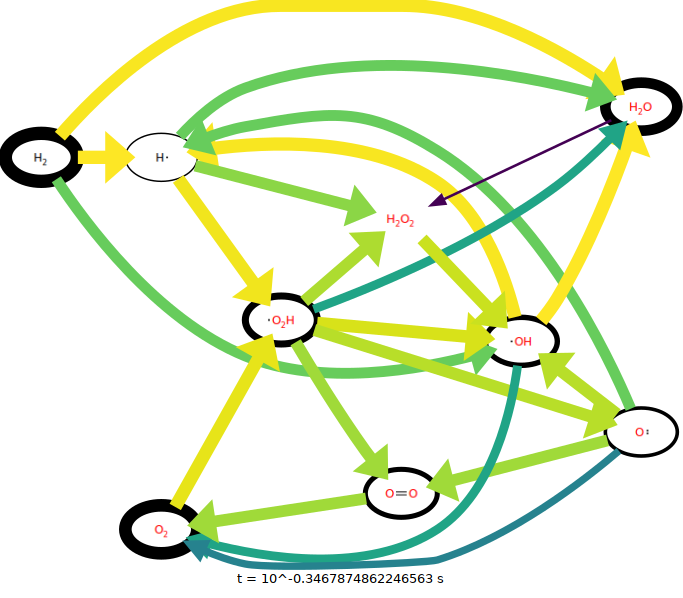

In [11]:
t = 0.45
rms.getfluxdiagram(sim, t)

## Plot rops
Plot rops for specified species at specified time

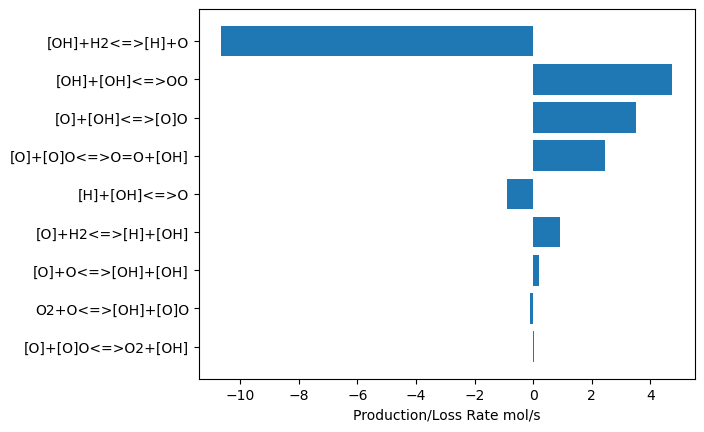

In [15]:
spc = "[OH]"
rms.plotrops(sim, spc, t)

## Plot radicalrops
Plot rops for the production and destruction of radicals at specified time point `t`

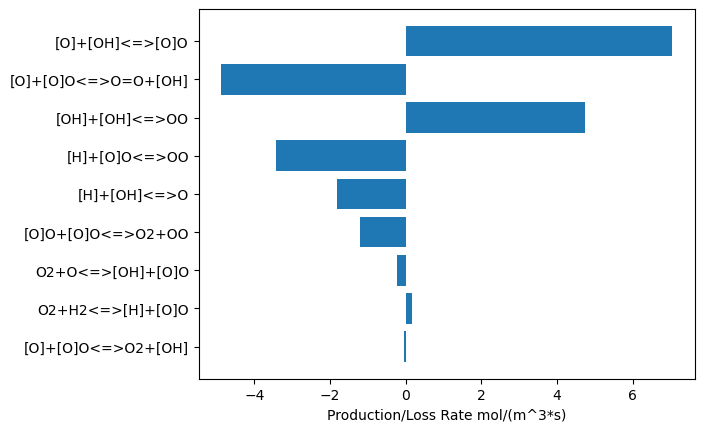

In [13]:
rms.plotradicalrops(sim, t)